Proyecto Final realizado para el Máster en Ciencia de Datos 2022/23 de la Universidad de Alicante.

Asignatura: Trabajo Fin del Máster

Autor: Kelly Turbay Eljach

# Introducción:

Este trabajo de investigación utilizará un conjunto de datos sobre la predicción de riesgo de diabetes en etapa temprana basado en factores de riesgo y condiciones físicas. El conjunto de datos fue obtenido de la página web del repositorio UCI Machine Learning, específicamente del siguiente enlace: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset.

El objetivo será aplicar varios modelos de ensembles al conjunto de datos de riesgo de diabetes para desarrollar herramientas computacionales eficientes en la detección temprana del riesgo de diabetes, aprovechando el trabajo previo realizado por los autores del conjunto de datos. Los ensembles son una técnica utilizada en aprendizaje automático que combina múltiples modelos individuales para mejorar la precisión y el rendimiento de las predicciones. Para este proyecto, nos inspiramos en el código utilizado por Francesc Bellido Delgado y Manuel Peiró Agulló, estudiantes del Máster de Ciencia de Datos en el curso 2022-2023, en su práctica 2 de Minería de Datos. Puedes encontrar el código en la siguiente URL: https://www.kaggle.com/code/fbellidompeiro/p2-miner-adatos#7.-Ensembles.

Se espera que este trabajo de investigación contribuya al campo de la detección y prevención temprana de la diabetes, al proporcionar herramientas efectivas basadas en algoritmos de ensembles. Estas herramientas podrían ser de gran utilidad en el ámbito de la salud pública, permitiendo identificar de manera precisa el riesgo de diabetes en función de los factores de riesgo y la condición física de las personas.

## Importación de librerías y datos
En este apartado se realiza la importación de las librerías necesarias para el pre-procesamiento, interpretación de resultados, análisis y visualización de los datos, así como la carga del dataset y el uso de diferentes técnicas de análisis como regresión, clasificación, ensembles y clustering.

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Importación de librerías de Python que necesitaremos en este proyecto

from google.colab import files # trabajar con archivos en Google Colab
import pandas as pd

import time
import warnings
import io
import random

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pickle # Serializar datos
import sklearn

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer # Imputación con la librería sklearn
from sklearn.impute import KNNImputer # Imputación  de valores faltantes utilizando el algoritmo K-Nearest Neighbors (KNN)

from sklearn.model_selection import train_test_split # Libreria para realizar train test
from sklearn.linear_model import LogisticRegression,SGDClassifier # Import for LogisticRegression
from sklearn.model_selection import KFold # Import for apply crossvalidation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler # Import LabelEncoder y scaler

from sklearn.metrics import precision_score # Import para la métrica precission
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # R2, MAE y MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Import para SVC
from sklearn.tree import DecisionTreeRegressor # Decision tree Regressor
from sklearn.neighbors import KNeighborsRegressor # Knn
from sklearn.svm import SVR # SVR
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler # Import scaler
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression # LinearRegression
#from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier # Import para DecissionTree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import plot_tree
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import StackingClassifier
from sklearn.utils.multiclass import unique_labels

from tqdm import tqdm
from itertools import cycle, islice
from scipy import stats
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
%matplotlib inline
from typing import Optional

np.random.seed(0)
pd.options.mode.chained_assignment = None  # Evitamos warnings indeseados

In [ ]:
# Cargamos el fichero CSV con los datos sobre crímenes en Los Ángeles
df = pd.read_csv("https://raw.githubusercontent.com/kellyturbay/TFM-Ensembles/main/diabetes_data_upload.csv",header=0)
df.head(5)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Para analizar datos, es necesario tener una idea general de las características de un conjunto de datos. Para ello, es útil utilizar diversas herramientas estadísticas que nos permitan conocer los datos a tratar y analizar los mismos. Con base en ello, iniciamos con observar un resumen del dataset seleccionado a través del método 'info' que nos permitirá tener un resumen del mismo.

In [ ]:
# Imprimimos información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## Información sobre el dataset
Este conjunto de datos está compuesto por 519 filas con 17 columnas. Las columnas representan diferentes características y factores de riesgo relacionados con la diabetes, como la edad, el género, la poliuria, la polidipsia, la pérdida repentina de peso, la debilidad, la polifagia, el afta genital, el desenfoque visual, el picor, la irritabilidad, la cicatrización retardada, la paresia parcial, la rigidez muscular, la alopecia y la obesidad. La columna "class" indica si el individuo tiene o no diabetes.

Este conjunto de datos puede ser utilizado para desarrollar modelos de aprendizaje automático para predecir el riesgo de diabetes en etapa temprana en función de los factores de riesgo y las condiciones físicas mencionadas anteriormente.

A continuación, una breve descripción de las columnas presentes en el conjunto de datos de predicción de riesgo de diabetes en etapa temprana:

* Age: Edad de la persona (valor numérico en años).
* Gender: Género de la persona (valores categóricos: "Male" para masculino y "Female" para femenino).
* Polyuria: Presencia de poliuria (valores categóricos: "Yes" para sí y "No" para no).
* Polydipsia: Presencia de polidipsia (valores categóricos: "Yes" para sí y "No" para no).
* sudden weight loss: Pérdida repentina de peso (valores categóricos: "Yes" para sí y "No" para no).
* weakness: Presencia de debilidad (valores categóricos: "Yes" para sí y "No" para no).
* Polyphagia: Presencia de polifagia (valores categóricos: "Yes" para sí y "No" para no).
* Genital thrush: Presencia de afta genital (valores categóricos: "Yes" para sí y "No" para no).
* visual blurring: Presencia de desenfoque visual (valores categóricos: "Yes" para sí y "No" para no).
* Itching: Presencia de picor (valores categóricos: "Yes" para sí y "No" para no).
* Irritability: Presencia de irritabilidad (valores categóricos: "Yes" para sí y "No" para no).
* delayed healing: Cicatrización retardada (valores categóricos: "Yes" para sí y "No" para no).
* partial paresis: Presencia de paresia parcial (valores categóricos: "Yes" para sí y "No" para no).
* muscle stiffness: Presencia de rigidez muscular (valores categóricos: "Yes" para sí y "No" para no).
* Alopecia: Presencia de alopecia (valores categóricos: "Yes" para sí y "No" para no).
* Obesity: Presencia de obesidad (valores categóricos: "Yes" para sí y "No" para no).
* class: Indicador si el individuo tiene o no diabetes (valores categóricos: "Positive" indica que el individuo tiene diabetes y "Negative" indica que no la tiene).

# Limpieza y preparación de datos
En esta sección nos enfocaremos en la limpieza y transformación de los datos. Nuestro objetivo es verificar la presencia de datos duplicados o faltantes, y luego aplicar las transformaciones y filtros necesarios.

## Detección de datos duplicados

Comenzamos por analizar si hay duplicados en los datos, es decir, registros que sean idénticos en todas las columnas.

In [ ]:
# Comprobamos si existen filas enteras duplicadas
df.duplicated().sum()

269

In [ ]:
df[df.duplicated(keep=False)].head(4)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
17,67,Male,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive
18,66,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,No,Positive
19,43,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,Positive
20,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive


Después de realizar la verificación, hemos identificado un total de 269 filas duplicadas en el conjunto de datos.

Estas filas duplicadas corresponden a registros repetidos de individuos. La razón de los datos duplicados podría deberse a errores en la recopilación de datos, ingreso de datos repetidos o cualquier otro problema durante la recolección y almacenamiento de los datos.

Con la finalidad de asegurar la calidad y consistencia de los datos, se eliminará las filas duplicadas, ya que no aportan información adicional y podrían afectar el análisis posterior y los resultados obtenidos.

In [ ]:
# Eliminamos las filas enteras duplicadas
df.drop_duplicates()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## Valores ausentes

Ahora verificamos la presencia de valores faltantes en las diversas columnas del conjunto de datos y procederemos a corregirlos en los casos necesarios.

In [ ]:
# Obtenemos el número de valores NA en cada columna
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

No se observan valores nulos en ninguna de las características del dataset.

## Transformaciones
En esta sección, realizaremos la transformación de los datos para asegurarnos de que estén en sus tipos correctos. Se visualizará los tipos de datos actuales para identificar las columnas que requieren corrección.

In [ ]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

No es necesario realizar transformaciones, ya que los tipos de datos de cada columna están correctos.

## Valores anómalos
En esta sección, validaremos la existencia de datos anómalos o incorrectos de nuestro conjunto de datos. Para lograrlo, realizaremos algunas verificaciones.

Para comenzar, imprimiremos los valores de la columna edad de los participantes para identificar posibles valores anómalos, como aquellos que se hayan registrado como 0 o -1.

In [ ]:
df['Age'].value_counts()

35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: Age, dtype: int64

Generamos un histograma por cada variable a fin de identificar la existencia de datos anómalos.

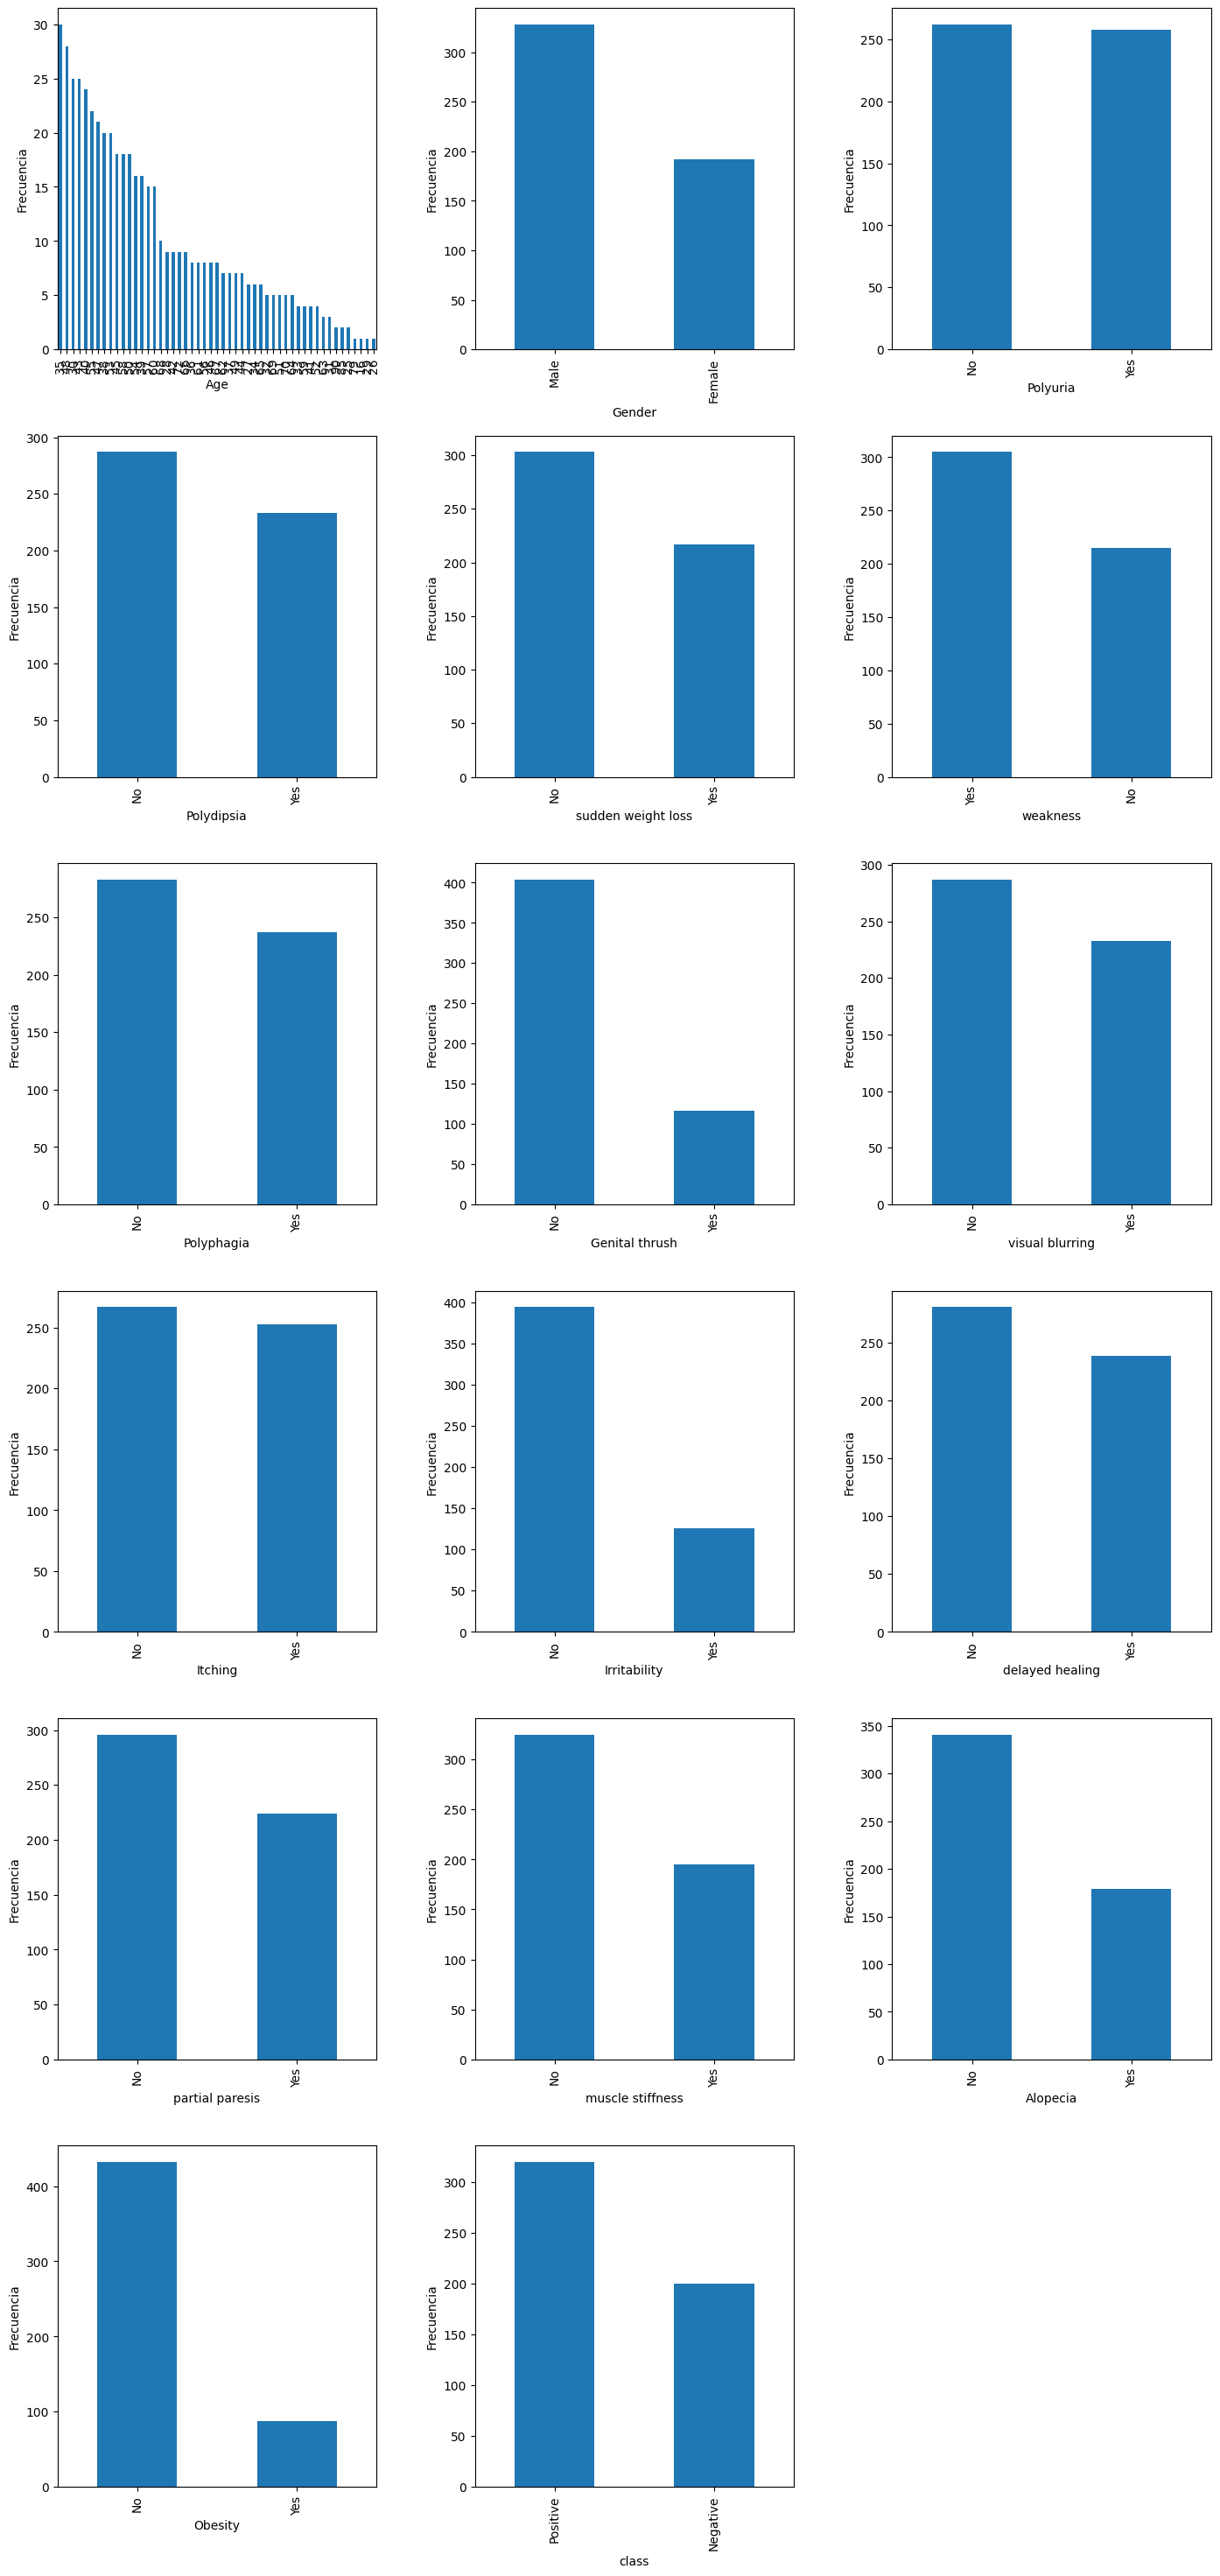

In [ ]:
data = pd.DataFrame(df)

# Obtiene las columnas categóricas
categorical_columns = data.select_dtypes(include=['int64','object']).columns


# Calcula el número de filas necesarias
num_rows = (len(categorical_columns) + 2) // 3  # 2 para los títulos y el espaciado

# Genera los gráficos en varias líneas
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    data[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajusta los gráficos adicionales si el número de columnas no es múltiplo de 3
if len(categorical_columns) % 3 != 0:
    for i in range(len(categorical_columns) % 3, 3):
        fig.delaxes(axes[num_rows-1, i])

plt.show()


No se observaron datos anómalos en el dataset de niveles de obesidad.

In [ ]:
print(f'El conjunto de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas')

El conjunto de datos consta de 520 filas y 17 columnas


## Filtros

En esta sección, nos enfocaremos en fusionar variables existentes para crear nuevas características y eliminar aquellas que no sean relevantes o necesarias para nuestro análisis. Iniciamos con la edad de la población obtenida en el dataset.

### Edad

In [ ]:
# Edad de los pacientes
df['Age'].value_counts().tail(10)

52    4
63    3
31    3
90    2
85    2
25    2
79    1
16    1
29    1
26    1
Name: Age, dtype: int64

Basado en los valores obtenidos, se evidencian edades minoritarias dentro del conjunto de datos. No obstante, se optará por no descartar estas edades.

### Gender: Género

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

### Polyuria: Presencia de micción excesiva (orina)

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Polyuria'].value_counts()

No     262
Yes    258
Name: Polyuria, dtype: int64

### Polydipsia: Sed excesiva

Solo tiene 2 clases por lo cual se mantiene los datos

In [ ]:
df['Polydipsia'].value_counts()

No     287
Yes    233
Name: Polydipsia, dtype: int64

### sudden weight loss: Pérdida repentina de peso

Solo tiene 2 clases por lo cual se mantiene los datos

In [ ]:
df['sudden weight loss'].value_counts()

No     303
Yes    217
Name: sudden weight loss, dtype: int64

### weakness: Debilidad

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['weakness'].value_counts()

Yes    305
No     215
Name: weakness, dtype: int64

### Polyphagia: Aumento anormal del apetito

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Polyphagia'].value_counts()

No     283
Yes    237
Name: Polyphagia, dtype: int64

### Genital thrush: Candidiasis genital infección causada por el crecimiento excesivo del hongo

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Genital thrush'].value_counts()

No     404
Yes    116
Name: Genital thrush, dtype: int64

### visual blurring: 8.	Visión borrosa
Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['visual blurring'].value_counts()

No     287
Yes    233
Name: visual blurring, dtype: int64

### Itching: Prurito o picazón en la piel

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Itching'].value_counts()

No     267
Yes    253
Name: Itching, dtype: int64

### Irritability: Cambios de humor y comportamiento irritables

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Irritability'].value_counts()

No     394
Yes    126
Name: Irritability, dtype: int64

### delayed healing: Demora en la cicatrización de heridas

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['delayed healing'].value_counts()

No     281
Yes    239
Name: delayed healing, dtype: int64

### heapartial paresis: Parálisis parcial en una parte del cuerpo

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['partial paresis'].value_counts()

No     296
Yes    224
Name: partial paresis, dtype: int64

### muscle stiffness: Rigidez muscular

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['muscle stiffness'].value_counts()

No     325
Yes    195
Name: muscle stiffness, dtype: int64

### Alopecia: Alopecia o pérdida de cabello en ciertas áreas del cuerpo

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Alopecia'].value_counts()

No     341
Yes    179
Name: Alopecia, dtype: int64

### Obesity: Obesidad

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
df['Obesity'].value_counts()

No     432
Yes     88
Name: Obesity, dtype: int64

### class: Clase o etiqueta de cada muestra en relación con la presencia o ausencia de diabetes

Se observa desbalanceados por lo cual se mantiene todas las filas y se balanceará los datos en una sección posterior.

In [ ]:
# Niveles de obesidad
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

# Imputación

Dado que el conjunto de datos no contiene valores nulos o faltantes, no es necesario realizar ningún proceso de imputación.

In [ ]:
# Verificar si hay valores nulos o faltantes en el DataFrame
df.isnull().values.any()

False

# Selección y extracción de características
En esta sección nos enfocaremos en seleccionar y extraer características relevantes de nuestro conjunto de datos. Utilizaremos diversos métodos de selección para identificar aquellas características que sean más útiles para nuestros propósitos. No se realizará la validación mediante **selección de valores ausentes**, ya que el conjunto de datos no contiene registros nulos.

## Selección por varianza
Comenzaremos aplicando el método de selección por varianza a las columnas numéricas. Nuestro objetivo es analizar si la varianza de estas columnas es menor a 1, lo cual nos indicaría que presentan poca variabilidad en sus valores.

In [ ]:
# Obtenemos las columnas numéricas
df_num = df.select_dtypes(exclude=['object'])

# Declaramos el selector que obtendrá las columnas con una varianza menor de 1
selector = VarianceThreshold(threshold=1)

# Analizamos las varianzas del DataFrame
selector.fit(df_num)

# Obtenemos las columnas seleccionadas
mask = selector.get_support()

# Imprimos las columnas cuya varianza era menor de 1
print(df_num.loc[:,~mask].columns.values)

[]


Se observa que no hay columnas con poca varianza.

## Extracción manual de características
Acorde con los resultados anteriores, se procederá a unir variables o eliminar variables.

En la sección anterior, se ha decidido eliminar las columnas género (Gender) (género), cambios de humor y comportamiento irritables (Irritability), rigidez muscular (muscle stiffness) y alopecia (Alopecia) dado a que estas variables no son síntomas específicos de la diabetes y pueden estar asociada con otros problemas de salud.

In [ ]:
df.drop(['Gender', 'Irritability','muscle stiffness','Alopecia'], axis=1, inplace=True)
df1 = df
print(f'El conjunto de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas')

El conjunto de datos consta de 520 filas y 13 columnas


A continuación, se presentan las características seleccionadas y modificadas en comparación con los datos iniciales:

1. `Age`: Edad de la persona.
2. `Polyuria`: Presencia de micción excesiva (orina).
3. `Polydipsia`: Presencia de sed excesiva.
4. `sudden weight loss`: Pérdida repentina de peso.
5. `weakness`: Sensación general de debilidad.
6. `Polyphagia`: Aumento anormal del apetito.
7. `Genital thrush`: Candidiasis genital.
8. `visual blurring`: Visión borrosa.
9. `Itching`: Presencia de picazón en la piel.
10. `delayed healing`: Cicatrización retardada de heridas.
11. `partial paresis`: Paresia parcial.
12. `Obesity`: Obesidad.
13. `class`: Clase de presencia o ausencia de diabetes.

Después de aplicar las transformaciones, filtrar los datos y selección de características, hemos obtenido un conjunto de datos que resume alrededor de 510 registros en 13 columnas.

Como resultado de los pasos anteriores, ahora disponemos de un conjunto de datos preprocesado y limpio, sin valores faltantes, que contiene las columnas necesarias para llevar a cabo tareas de ensembles.

# Técnica de ensembles

En este apartado, analizaremos diferentes técnicas de combinación de ensembles. Los ensembles son una técnica de aprendizaje automático que se basa en combinar múltiples modelos individuales para lograr una predicción más precisa y robusta que la que se puede obtener de un solo modelo. Los modelos individuales en un ensemble pueden ser del mismo tipo o diferentes, y pueden ser entrenados en diferentes subconjuntos de los datos de entrenamiento.

Para ello, emplearemos tres enfoques específicos: bagging, boosting y stacking. A continuación, explicaremos brevemente cada uno de ellos:

1. Bagging: Entrena varios modelos utilizando subconjuntos aleatorios del conjunto de datos de entrenamiento. Posteriormente, se combinan las predicciones de estos modelos mediante votación o promedio, lo que permite obtener un resultado final más preciso.

2. Boosting: Los modelos se entrenan secuencialmente, dándole mayor peso a los errores de las predicciones anteriores. De esta manera, el modelo se ajusta gradualmente para mejorar su rendimiento y capacidad de predicción.

3. Stacking: Se combina la salida de varios modelos en un conjunto de datos auxiliar. Luego, se entrena otro modelo utilizando estas predicciones como características para predecir la variable objetivo. La finalidad es aprovechar las fortalezas individuales de cada modelo y mejorar la precisión global de las predicciones.

En el conjunto de datos de diabetes, nos enfocaremos en la clasificación de la columna "Class", que representa la presencia o ausencia de la enfermedadd. Para aplicar las técnicas de ensembles,vamos a verificar si el conjunto de datos está equilibrado en cuanto a esta variable y prepararemos los datos necesarios para llevar a cabo el ejercicio

### Balanceo de datos

Se valida si la clase o etiqueta de la variable respuesta se encuentra balanceada.

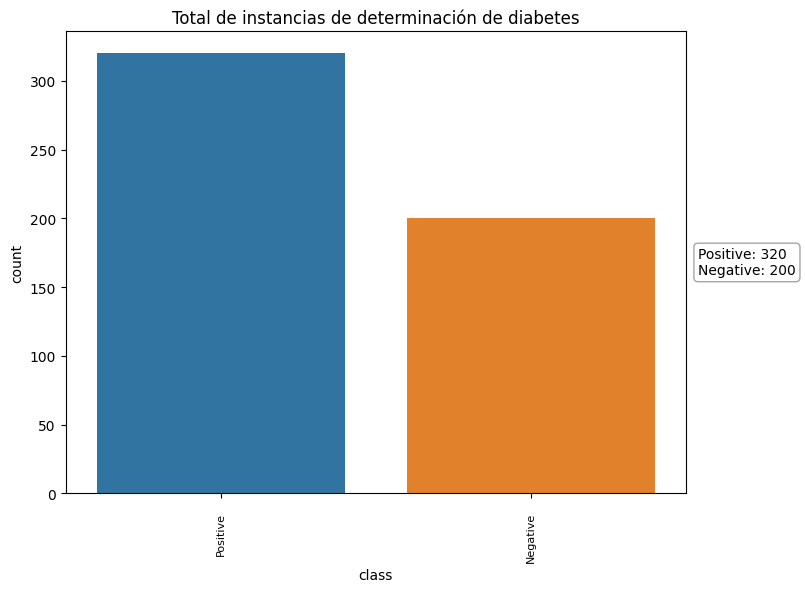

Número de instancias por clase:
Positive    320
Negative    200
Name: class, dtype: int64


In [ ]:
# Creación de una copia del dataframe balanceado para no afectar a los datos originales y así evitar posibles errores
data = df.copy()

# Gráfico con el total de instancias de la clase de diabetes
plt.figure(figsize=(8, 6))  # Tamaño de la figura
ax = sns.countplot(data=data, x='class')
plt.title("Total de instancias de determinación de diabetes")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)  # Aumenta el ángulo y el tamaño de la fuente
ax.tick_params(axis='x', pad=10)  # Ajusta el espacio entre las leyendas y el eje x

# Obtener el número de instancias por clase
value_counts = df['class'].value_counts()

# Agregar el cuadro de texto al lado del gráfico
textbox_text = '\n'.join(f"{label}: {count}" for label, count in value_counts.items())
props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7)
plt.text(1.02, 0.5, textbox_text, transform=ax.transAxes, bbox=props, verticalalignment='center')

plt.show()
print('Número de instancias por clase:')
print(df['class'].value_counts())


Se observa desbalanceo en la clase, class por lo cual, se procede a balancear los datos con la técnica SMOTE.

In [ ]:
#!pip install -U scikit-learn==0.24.2 imbalanced-learn==0.8.0

In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

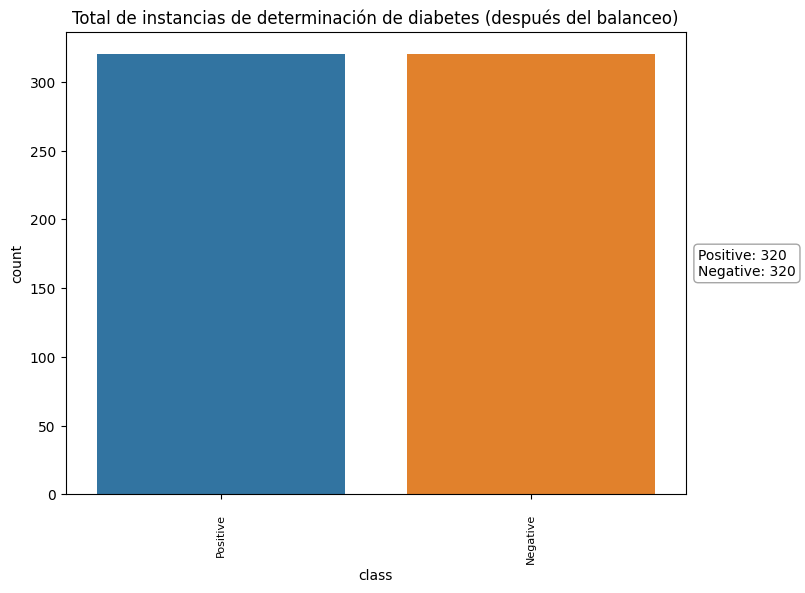

Número de instancias por clase después del balanceo:
Positive    320
Negative    320
Name: class, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Creación de una copia del dataframe balanceado para no afectar a los datos originales y así evitar posibles errores
data = df.copy()

# Convertir variables categóricas en variables dummy
categorical_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
                       'delayed healing', 'partial paresis', 'Obesity']
data = pd.get_dummies(data, columns=categorical_columns)

# Separar las variables predictoras (X) y la variable objetivo (y)
X = data.drop('class', axis=1)
y = data['class']

# Aplicar SMOTE para generar muestras sintéticas de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo dataframe con los datos balanceados
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar el balanceo de clases después de aplicar SMOTE
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=balanced_data, x='class')
plt.title("Total de instancias de determinación de diabetes (después del balanceo)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)
ax.tick_params(axis='x', pad=10)
textbox_text = '\n'.join(f"{label}: {count}" for label, count in balanced_data['class'].value_counts().items())
props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7)
plt.text(1.02, 0.5, textbox_text, transform=ax.transAxes, bbox=props, verticalalignment='center')
plt.show()

print('Número de instancias por clase después del balanceo:')
print(balanced_data['class'].value_counts())


In [ ]:
balanced_data.head(3)

,Age,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,...,visual blurring_Yes,Itching_No,Itching_Yes,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,Obesity_No,Obesity_Yes,class
0,40,1,0,0,1,1,0,0,1,1,...,0,0,1,0,1,1,0,0,1,Positive
1,58,1,0,1,0,1,0,0,1,1,...,1,1,0,1,0,0,1,1,0,Positive
2,41,0,1,1,0,1,0,0,1,0,...,0,0,1,0,1,1,0,1,0,Positive


Los datos se encuentran balanceados. Ahora seleccionaremos los datos.

### Selección y preparación de los de datos

Para aplicar esta técnica, seleccionaremos todas las columnas como variables de entrada, y a "class" como variable de salida.

Una vez tenemos el conjunto de datos que vamos a utilizar, realizamos un split, donde utilicemos el 70% de los datos para el train y el 30% de los datos.

In [ ]:
# Seleccionamos todas las columnas menos aquella que queremos predecir
data = balanced_data
x = data.iloc[:, :-1]
y = data['class']

# Iterar sobre las columnas y aplicar la transformación LabelEncoder
for col in x:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Convertimos las variables categóricas de 'y' en numéricas
le_descent = LabelEncoder()
y = le_descent.fit_transform(y)

# Convertimos 'y' en un array de numpy
y = np.array(y)

### Escalamiento de los datos

El escalamiento de los datos es una técnica común de preprocesamiento que se aplica a los datasets antes de aplicar técnicas de aprendizaje automático para garantizar que las variables tengan el mismo peso en los cálculos y para mejorar el rendimiento del modelo.

Para los fines de esta práctica, se utilizarán la clase StandardScaler para aplicar la técnica de ensembles.

In [ ]:
# Escalamos los datos de 'X'
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns = x.columns)

# Hacemos una copia de los datos ya preparados
x_copy = x.copy()
y_copy = y.copy()

#### Train y Test

Una vez tenemos el conjunto de datos que vamos a utilizar, realizamos un split, donde utilicemos el 70% de los datos para el train y el 30% de los datos para el test. Para ello utiliza la función train_test_split de Sklearn.(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# summarize the shape of the train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(448, 23) (192, 23) (448,) (192,)


### Funciones auxiliares
A continuación, se definen funciones necesarias que permitarán generar la matriz de confusión, curva ROC y cálculo de métricas.


In [ ]:
# Funcion plot_confusion_matrix para crear una Matriz de confusión

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_true, y_pred, y_score=None, pos_label='positive'):
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_true, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_true, y_pred)))

  # graficar matriz de confusión
  display_labels = sorted(unique_labels(y_true, y_pred), reverse=True)
  cm = confusion_matrix(y_true, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'y':0.95, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()


  # curva roc (definido para clasificación binaria)
  fig_roc = None
  if y_score is not None:
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    fig_roc = px.area(
        x=fpr, y=tpr,
        title = f'Curva ROC (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='Ratio Falsos Positivos', y='Ratio Verdaderos Positivos'),
        width=400, height=400
    )
    fig_roc.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

    fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
    fig_roc.update_xaxes(constrain='domain')

    fig_roc.show()

print('Done!')


Done!


## Stacking ensemble

### Búsqueda de hiperparámetros.

En este apartado se buscará las configuraciones óptimas para los hiperparámetros del modelo. Este paso es fundamental para optimizar un modelo y obtener su máximo desempeño. Para ello, utilizaremos una función de búsqueda de la biblioteca scikit-learn llamada Cuadrícula con Validación Cruzada (GridSearchCV).

 Esta función automatiza el proceso de búsqueda exhaustiva de los mejores hiperparámetros para un modelo y devuelve los mejores hiperparámetros que produjeron el mejor rendimiento.

 #### **KNeighborsClassifier**
 KNeighborsClassifier es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación, el cual, implementa el voto de los k vecinos más cercanos. Dado un punto de datos, el algoritmo busca los k vecinos más cercanos en el conjunto de entrenamiento y asigna la clase más común entre esos vecinos al punto de datos ¹. Los hiperparámetros importantes incluyen el

 * Número de vecinos (n_neighbors) que determina la cantidad de vecinos más cercanos que se utilizarán para clasificar un punto de datos.

 * La función de peso (weights) que controla cómo se asignan los pesos a los vecinos más cercanos.

 * El algoritmo utilizado para calcular los vecinos más cercanos (algorithm)

 * La métrica de distancia utilizada (metric)¹ que permite calcular la distancia entre puntos de datos. El valor predeterminado es “minkowski”, que resulta en la distancia euclidiana estándar cuando el parámetro p se establece en 2. Otros valores posibles para metric incluyen “euclidean”, “manhattan”, “chebyshev” y “hamming”, entre otros.

 * (p) parámetro de potencia para la métrica de Minkowski. Si p = 1, equivale a usar la distancia de Manhattan (l1). Si p = 2 (valor prederterminado), se utiliza la distancia euclidiana (l2). Para valores arbitrarios de p, se utiliza la distancia de Minkowski (l_p).

Referencias:

(1) sklearn.neighbors.KNeighborsClassifier — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.
(2) sklearn.neighbors.NearestNeighbors — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html.
(3) ¿Qué es el algoritmo de k vecinos más cercanos? | IBM. https://www.ibm.com/es-es/topics/knn.

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# Definimos los valores de n_neighbors que queremos probar
parameters = {
    'n_neighbors': range(1, 10)
    #'weights': ['uniform', 'distance']
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    #'p': [1, 2],
    #'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Instanciamos el modelo KNN
knn = KNeighborsClassifier()

# Instanciamos el objeto GridSearchCV
grid_obj = GridSearchCV(knn, parameters)

# Ajustamos el modelo
grid_fit = grid_obj.fit(x_train, y_train)

# Obtenemos el mejor estimador
best_knn = grid_fit.best_estimator_

# Obtenemos el mejor valor de n_neighbors
#best_n_neighbors = best_knn.get_params()['n_neighbors']

# Mostramos el mejor parámetro encontrado
#print("Mejor número de vecinos para el algoritmo KNN:", best_n_neighbors)
print("Mejores hiperparámetros encontrados:")
print("n_neighbors:", best_knn.get_params()['n_neighbors'])
print("weights:", best_knn.get_params()['weights'])
print("algorithm:", best_knn.get_params()['algorithm'])
print("p:", best_knn.get_params()['p'])
print("metric:", best_knn.get_params()['metric'])

Mejores hiperparámetros encontrados:
n_neighbors: 1
weights: uniform
algorithm: auto
p: 2
metric: minkowski


#### **DecisionTreeClassifier**

Algoritmo de aprendizaje supervisado utilizado para problemas de clasificación y regresión ¹. Este algoritmo construye un árbol de decisión para predecir el valor de una variable objetivo mediante la aplicación de reglas de decisión simples inferidas a partir de las características de los datos ².

Los principales hiperparámetros del modelo DecisionTreeClassifier son:

* **criterio (criterion)**, que especifica la función utilizada para medir la calidad de una división en el árbol. Los valores comunes para el criterio incluyen "gini" para la impureza de Gini y "entropy" para la ganancia de información.

* La **profundidad máxima del árbol (max_depth)**, que controla la cantidad de divisiones o niveles del árbol. Un valor más alto permite capturar relaciones más complejas en los datos, pero también puede aumentar el riesgo de sobreajuste.  

* El **número mínimo de muestras requeridas para dividir un nodo interno (min_samples_split)** y

* El **número mínimo de muestras requeridas en un nodo hoja (min_samples_leaf)**.

Estos hiperparámetros permiten ajustar el modelo para capturar relaciones más complejas en los datos y evitar el sobreajuste.

Referencias:

(1) sklearn.tree.DecisionTreeClassifier — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.
(2) 1.10. Decision Trees — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/tree.html.
(3) Decision Tree Classifier with Sklearn in Python • datagy. https://datagy.io/sklearn-decision-tree-classifier/.

In [ ]:
# Definimos los hiperparámetros que queremos probar
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 9, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciamos el modelo Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Instanciamos el objeto GridSearchCV
grid_obj = GridSearchCV(dt, parameters)

# Ajustamos el modelo
grid_fit = grid_obj.fit(x_train, y_train)

# Obtenemos el mejor estimador
best_dt = grid_fit.best_estimator_

# Obtenemos los mejores hiperparámetros
best_params = best_dt.get_params()

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para el Decision Tree:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Mejores hiperparámetros para el Decision Tree:
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best


#### **SVM - Máquinas de Vectores de Soporte**

SVM es un algoritmo de aprendizaje supervisado utilizado en problemas de clasificación y regresión. Este algoritmo construye un modelo que asigna nuevos ejemplos a una categoría u otra, lo que lo convierte en un clasificador binario lineal no probabilístico. SVM mapea ejemplos de entrenamiento a puntos en el espacio de manera que maximice el ancho del espacio entre las dos categorías. Los nuevos ejemplos se asignan a una categoría u otra en función de en qué lado del espacio caen. Además de realizar la clasificación lineal, SVM también puede realizar una clasificación no lineal utilizando lo que se llama el truco del kernel, mapeando implícitamente sus entradas en espacios de características de alta dimensión.

Los principales hiperparámetros del SVC son:

* C: que controla el término de regularización y la tolerancia al error; es decir, el parámetro C controla la fuerza de la regularización y determina el equilibrio entre lograr un margen grande y minimizar las violaciones del margen ².
Un valor bajo permite una mayor cantidad de puntos mal clasificados. Un valor alto clasifica correctamente todos los puntos de entrenamiento, pero podría llevar a un modelo más complejo y un mayor sobreajuste.

* kernel: el kernel especifica el tipo de función de decisión utilizada para transformar los datos en un espacio de características de alta dimensión. Los valores comunes para el kernel incluyen "linear", "poly", "rbf" y "sigmoid" ². Algunos valores comunes para el kernel son 'linear', 'poly', 'rbf' y 'sigmoid'.

* coeficiente gamma: que controla la influencia de cada ejemplo de entrenamiento.Un valor bajo determina una alta influencia y un valor alto indica una influencia más amplia que puede resultar en una frontera de decisión más compleja. ²

Estos hiperparámetros pueden afectar significativamente el rendimiento del modelo y deben ajustarse cuidadosamente utilizando técnicas como la validación cruzada.

Referencias:

(1) sklearn.svm.SVC — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.
(2) Understanding SVM Hyperparameters, Stack Abuse. https://stackabuse.com/understanding-svm-hyperparameters/.
(3) Hyperparameters of the Support Vector Machine, Philipp Probst https://philipppro.github.io/Hyperparameters_svm_/.
(4) Hiperparámetros de SVM explicados con visualizaciones - ICHI.PRO. https://ichi.pro/es/hiperparametros-de-svm-explicados-con-visualizaciones-22257741819931.
(5) Hyperparameters of the Support Vector Machine | R-bloggers. https://www.r-bloggers.com/2018/08/hyperparameters-of-the-support-vector-machine/.


In [ ]:
# Definimos los hiperparámetros que queremos probar
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 0.01, 'scale']
}

# Instanciamos el modelo SVC
svc = SVC(random_state=42)

# Instanciamos el objeto GridSearchCV
grid_obj = GridSearchCV(svc, parameters)

# Ajustamos el modelo
grid_fit = grid_obj.fit(x_train, y_train)

# Obtenemos el mejor estimador
best_svc = grid_fit.best_estimator_

# Obtenemos los mejores hiperparámetros
best_params = best_svc.get_params()

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para el SVC:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Mejores hiperparámetros para el SVC:
C: 1
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.1
kernel: rbf
max_iter: -1
probability: False
random_state: 42
shrinking: True
tol: 0.001
verbose: False


#### **LogisticRegression**
Es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación binaria y multiclase¹. Este algoritmo construye un modelo que estima la probabilidad de que un ejemplo pertenezca a una clase en particular ⁴. Los hiperparámetros principales que se pueden ajustar son:

* **C**, que la fuerza de la regularización y determina el equilibrio entre ajustar bien los datos y mantener los pesos del modelo pequeños ¹.

* **solver**, que especifica el algoritmo utilizado para optimizar los pesos del modelo, con opciones comunes que incluyen "newton-cg", "lbfgs", "liblinear", "sag" y "saga" ¹.

* **max_iter**, que determina el número máximo de iteraciones permitidas para que el algoritmo de optimización converja.

* **penalty**, el tipo de penalización que especifica la norma utilizada para la regularización, con opciones comunes que incluyen "l1", "l2" y "elasticnet" ¹.

Referencias:

(1) sklearn.linear_model.LogisticRegression - scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.
(2) 1.1. Linear Models — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/linear_model.html.
(3) sklearn.linear_model.LogisticRegressionCV - scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html.
(4) python - Why does sklearn logistic regression regularize both the weights and the intercept?. https://stackoverflow.com/questions/47067906/why-does-sklearn-logistic-regression-regularize-both-the-weights-and-the-interce.

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# Definir los hiperparámetros a probar
parameters = {
    'C': [0.1, 1, 10],  # Valores de regularización
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Algoritmo de optimización
    'max_iter': [100, 1000]  # Número máximo de iteraciones
}

# Instanciar el modelo LogisticRegression
logreg = LogisticRegression()

# Instanciar el objeto GridSearchCV
grid_obj = GridSearchCV(logreg, parameters)

# Ajustar el modelo
grid_fit = grid_obj.fit(x_train, y_train)

# Obtener el mejor estimador
best_logreg = grid_fit.best_estimator_

# Obtener los mejores hiperparámetros
best_parameters = grid_fit.best_params_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para LogisticRegression:", best_parameters)


Mejores hiperparámetros para LogisticRegression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


### Selección de modelos y ensamble

Este código define un ensamblado de modelos de apilamiento (stacking ensemble) utilizando la clase StackingClassifier de la librería Scikit-learn. Primero, se definen los "modelos base" que se utilizarán para predecir los resultados, en este caso, KNeighborsClassifier, DecisionTreeClassifier, SVM y LogisticRegression, y luego se define el "modelo meta" que se encarga de combinar las predicciones de los modelos base. Finalmente, se crea un objeto stacking de la clase StackingClassifier, que utiliza los modelos base y el modelo meta definidos previamente. La variable cv define el número de pliegues para la validación cruzada que se utiliza en el entrenamiento.

In [ ]:
# Establecer la semilla en todos los estimadores individuales
random_state = 42

# define the base models
base_models = list()
base_models.append(('knn', KNeighborsClassifier(n_neighbors=1, weights= 'distance')))
base_models.append(('cart', DecisionTreeClassifier(random_state=42, min_samples_split= 2,max_depth=None)))
#base_models.append(('cart', DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split= 2)))
base_models.append(('svm', SVC(random_state=42,C=10, gamma=0.1)))
base_models.append(('lr', LogisticRegression( random_state=42, max_iter=100, solver='liblinear')))

# define meta learner model
meta_learner = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=42)

# define the stacking ensemble
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=3)

#### - Evaluación del desempeño

A continuación, se ajusta el modelo StackingClassifier definido previamente utilizando los datos de entrenamiento x_train e y_train y luego se evalúa el error de predicción del modelo en el conjunto de datos de prueba x_test e y_test.

In [ ]:
clf = stacking.fit(x_train, y_train)

train_err = (clf.predict(x_test) != y_test).mean()
print(f'Train error: {train_err:.1%}')

Train error: 2.1%


El resultado obtenido luego de la evaluación es de 2.1%. Esto indica que el modelo  está funcionando bien, ya que está clasificando incorrectamente el 2% de las instancias en el conjunto de prueba.

In [ ]:
test_predict = clf.predict(x_test)
evaluate_model(y_test, test_predict)
print('Done!')

==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        98
           1       0.99      0.97      0.98        94

    accuracy                           0.98       192
   macro avg       0.98      0.98      0.98       192
weighted avg       0.98      0.98      0.98       192

Accuracy -> 97.92%



Done!


Con los resultados obtenidos, se observa que el modelo muestra una precisión general del 97.92%. Esto indica que es capaz de clasificar correctamente aproximadamente el 98% de los datos de prueba. La precisión individual para cada clase varía, con valores que oscilan entre el 97% y el 99%. Por lo tanto, el modelo demuestra un buen rendimiento en todas las clases.

Al analizar la métrica de recall, se confirma que el modelo puede recuperar correctamente la mayoría de las instancias de cada clase, con valores que van desde el 97% hasta el 99%. Esto significa que el modelo es capaz de identificar correctamente la mayoría de las instancias positivas para cada clase. Además, se observa un rendimiento destacado en todas las clases al evaluar la métrica de f1-score.

En conclusión, se puede afirmar que el modelo de stacking aplicado al conjunto de datos de niveles de diabetes logra una precisión general aceptable.

In [ ]:
!pip install cal

In [ ]:
! pip install boruta

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install lime

In [ ]:
# Definir los hiperparámetros a iterar
final_estimators = ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'LogisticRegression']
cv_values = [3, 5, 7, 9, 10]

# Establecer la semilla en todos los estimadores individuales
random_state = 42

# Lista para almacenar los resultados
results = []

# Iterar sobre los hiperparámetros y calcular los resultados
for estimator in final_estimators:
    for cv in cv_values:
        # Definir los modelos
        base_models = [
            ('knn', KNeighborsClassifier(n_neighbors=1,weights= 'distance')),
            ('cart', DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split= 2)),
            ('svm', SVC(random_state=42,C=10,gamma=0.1)),
            ('lr', LogisticRegression(random_state=42, max_iter=100, solver='liblinear'))
        ]
        meta_learner = LogisticRegression(random_state=42,multi_class='multinomial', solver='lbfgs', max_iter=10000)
        stacking = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=cv)

        # Entrenar el modelo
        clf = stacking.fit(x_train, y_train)

        # Calcular el error de entrenamiento
        train_err = (clf.predict(x_test) != y_test).mean()

        # Calcular las métricas de prueba
        test_predict = clf.predict(x_test)
        report = classification_report(y_test, test_predict, output_dict=True)

        # Guardar los resultados en la lista
        results.append([estimator, cv, train_err, report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score']])

# Crear la tabla de conclusiones usando pandas
conclusiones = pd.DataFrame(results, columns=['Final Estimator', 'CV', 'Train Error', 'Precision', 'Recall', 'F1-Score'])
print(conclusiones)



           Final Estimator  CV  Train Error  Precision    Recall  F1-Score
0   DecisionTreeClassifier   3     0.020833   0.979366  0.979167  0.979160
1   DecisionTreeClassifier   5     0.026042   0.974004  0.973958  0.973955
2   DecisionTreeClassifier   7     0.020833   0.979167  0.979167  0.979167
3   DecisionTreeClassifier   9     0.020833   0.979167  0.979167  0.979167
4   DecisionTreeClassifier  10     0.026042   0.974004  0.973958  0.973955
5     KNeighborsClassifier   3     0.020833   0.979366  0.979167  0.979160
6     KNeighborsClassifier   5     0.026042   0.974004  0.973958  0.973955
7     KNeighborsClassifier   7     0.020833   0.979167  0.979167  0.979167
8     KNeighborsClassifier   9     0.020833   0.979167  0.979167  0.979167
9     KNeighborsClassifier  10     0.026042   0.974004  0.973958  0.973955
10                     SVC   3     0.020833   0.979366  0.979167  0.979160
11                     SVC   5     0.026042   0.974004  0.973958  0.973955
12                     SV

Acorde con los resultados obtenidos, identificamos que un mayor o menor número de veces que se realiza la validación cruzada no asegura un menor error de entrenamiento. Se observa que con 10 particiones el error de entrenamiento es más bajo en cada estimador.

## Ensembles Bagging

Bagging es un método de ensemble que construye varios clasificadores base en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales para formar una predicción final ¹. Este método se utiliza para reducir la varianza de un estimador de caja negra (por ejemplo, un árbol de decisión) al introducir aleatorización en su procedimiento de construcción y luego hacer un conjunto a partir de él ².

Para comenzar con la técnica de bagging, el primer paso es declarar el modelo y especificar tanto los parámetros del modelo de bagging como los del clasificador base que se utilizará, en este caso, utilizaremos el DecisionTreeClassifier.¹ Podemos utilizar la librería scikit-learn para realizar este proceso.

Los principales hiperparámetros de Bagging incluyen el número de estimadores (n_estimators) se refiere a la cantidad de clasificadores base que se incluirán en el conjunto, es decir, cuántos árboles de decisión se entrenarán simultáneamente. El número máximo de muestras (max_samples) y el número máximo de características (max_features) determina la cantidad de muestras que se utilizarán para entrenar cada clasificador base, ya sea como un número entero que indica la cantidad exacta de muestras o como un valor entre 0 y 1 que representa la proporción de muestras totales a utilizar.

Los parámetros bootstrap y bootstrap_features (bootstrap y bootstrap_features) controlan si se deben utilizar muestras y características con reemplazo al construir los subconjuntos.¹

En nuestro caso, utilizaremos los hiperpárametos, `n_estimators`, `max_samples` `max_features`.

En cuanto a los parámetros del DecisionTreeClassifier, se puede probar especificando max_depth con un valor de 15 niveles de profundidad máxima, ya que ha demostrado ser efectivo en la clasificación anterior. Además, se puede probar estableciendo el parámetro max_leaf_nodes, que limita el número máximo de nodos hoja permitidos en el árbol.

Referencias:

(1) sklearn.ensemble.BaggingClassifier — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html.
(2) 1.11. Ensemble methods — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/ensemble.html.
(3) How to Develop a Bagging Ensemble with Python. https://machinelearningmastery.com/bagging-ensemble-with-python/.

Primero, halleremos los mejores hiperpárametros para esta técnica

In [ ]:
# Hacemos una copia de los datos ya preparados
x= x_copy.copy()
y= y_copy.copy()

# Definir los hiperparámetros a evaluar
param_grid = {
    'estimator__max_depth': [5, 10, 15],
    'estimator__max_leaf_nodes': [None, 3, 5],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.6, 0.7],
    'max_features': [0.7, 0.8, 0.9]
}

# Crear el modelo base
base_model = DecisionTreeClassifier(random_state=42)

# Crear el modelo Bagging
bagging = BaggingClassifier(estimator=base_model, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x, y)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'estimator__max_depth': 15, 'estimator__max_leaf_nodes': None, 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}


In [ ]:
# Hacemos una copia de los datos ya preparados
x= x_copy.copy()
y= y_copy.copy()

# Definimos el número de modelos que entrenaremos
num_models = 10

# Declaramos el modelo base con los parámetros
base_model = DecisionTreeClassifier(random_state=42, max_depth=15)

# Definimos el modelo Bagging con los parámetros
bagging = BaggingClassifier(estimator=base_model,
                            random_state=42,
                            n_estimators=200,
                            max_samples=0.6,
                            max_features=0.8)


A continuación, ajustamos el modelo de bagging previamente definido a los datos de entrenamiento utilizando el método fit. Luego, se calcula el error de entrenamiento utilizando el método predict para generar predicciones en los datos de entrenamiento y comparándolos con los valores verdaderos. Finalmente, se imprime el error de entrenamiento en formato porcentual.

Un error de entrenamiento muy bajo no siempre es deseable, ya que puede ser una señal de sobreajuste. Por lo tanto, experimentaremos con diferentes configuraciones para encontrar un modelo que pueda generalizar bien.

Se debe considerar que al tener un error de entrenamiento bajo no siempre es deseable, ya que podría deberse a un sobreajuste del modelo en el conjunto de datos de entrenamiento. Por ello, se realizará varios experimentos con diferentes configuración para halllar un modelo que pueda generalizar de manera efectiva.

In [ ]:
# Aplicamos el modelo Bagging a los datos de entrenamiento
clf = bagging.fit(x, y)

# Generamos el error de entrenamiento
train_err = (clf.predict(x) != y).mean()
print(f'Train Error: {train_err*100:.1f}%')


Train Error: 0.3%


In [ ]:
# Definimos diferentes configuraciones de hiperparámetros
param_configurations = [
    {'max_depth': 5, 'max_leaf_nodes': 15, 'n_estimators': 200, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 10, 'max_leaf_nodes': 15, 'n_estimators': 200, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 15, 'max_leaf_nodes': 15, 'n_estimators': 200, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 5, 'max_leaf_nodes': 2, 'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0},
    {'max_depth': 10, 'max_leaf_nodes': 3, 'n_estimators': 6, 'max_samples': 0.5, 'max_features': 0.5},
    {'max_depth': 15, 'max_leaf_nodes': 3, 'n_estimators': 4, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 15, 'max_leaf_nodes': 3, 'n_estimators': 200, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 5, 'max_leaf_nodes': 15, 'n_estimators': 100, 'max_samples': 0.6, 'max_features': 0.5},
    {'max_depth': 10, 'max_leaf_nodes': 15, 'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5},
    {'max_depth': 15, 'max_leaf_nodes': 15, 'n_estimators': 100, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 5, 'max_leaf_nodes': None, 'n_estimators': 200, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': 10, 'max_leaf_nodes': None, 'n_estimators': 200, 'max_samples': 0.5, 'max_features': 0.5},
    {'max_depth': 15, 'max_leaf_nodes': None, 'n_estimators': 200, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 10, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 6, 'max_samples': 0.6, 'max_features': 0.8},
    {'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 10, 'max_samples': 1.0, 'max_features': 0.5}
]


# Lista para almacenar los resultados
results = []

# Iteramos sobre las configuraciones de hiperparámetros y calculamos los errores de entrenamiento
for config in param_configurations:
    bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth=config['max_depth'], max_leaf_nodes=config['max_leaf_nodes']),
                                random_state=42, n_estimators=config['n_estimators'], max_samples=config['max_samples'], max_features=config['max_features'])
    clf = bagging.fit(x.to_numpy(), y)
    train_err = (clf.predict(x.to_numpy()) != y).mean()
    results.append(list(config.values()) + [train_err])

# Agregamos los resultados de los mejores hiperparámetros
results.append(list(best_params.values()) + [train_err])

# Creamos el DataFrame con los resultados
columns = ['max_depth', 'max_leaf_nodes', 'n_estimators', 'max_samples', 'max_features', 'Train Error']
df_results = pd.DataFrame(results, columns=columns)

# Imprimimos la tabla con los errores de entrenamiento
print(df_results)

    max_depth  max_leaf_nodes  n_estimators  max_samples  max_features  \
0         5.0            15.0         200.0          0.6           0.8   
1        10.0            15.0         200.0          0.6           0.8   
2        15.0            15.0         200.0          0.6           0.8   
3         5.0             2.0          10.0          1.0           1.0   
4        10.0             3.0           6.0          0.5           0.5   
5        15.0             3.0           4.0          0.6           0.8   
6        15.0             3.0         200.0          0.6           0.8   
7         5.0            15.0         100.0          0.6           0.5   
8        10.0            15.0         100.0          0.5           0.5   
9        15.0            15.0         100.0          0.6           0.8   
10        5.0             NaN         200.0          0.6           0.8   
11       10.0             NaN         200.0          0.5           0.5   
12       15.0             NaN         

Al analizar los resultados, podemos concluir que la variación de los hiperparámetros tiene un impacto significativo en el desempeño del modelo Bagging. Al experimentar con diferentes combinaciones de hiperparámetros, existen configuraciones que logran reducir el error de entrenamiento, como las configuraciones de las líneas 12 y 13. Siendo la 12 la de mejor resultado que es la configuración con los mejores hiperpárametros dada por la función GridSearchCV:


```
max_depth  max_leaf_nodes  n_estimators  max_samples  max_features
15.0             NaN         200.0          0.6           0.8   
NaN             NaN          10.0          0.6           0.8
```


A medida que se incrementa el número de estimadores, el error de entrenamiento puede reducirse, lo cual indica una mejora en la capacidad de generalización.

Con el modelo que hemos definido, podemos visualizar los árboles de decisión de cada modelo base y ver qué variable se utiliza en cada uno para clasificar la etnia de la víctima.



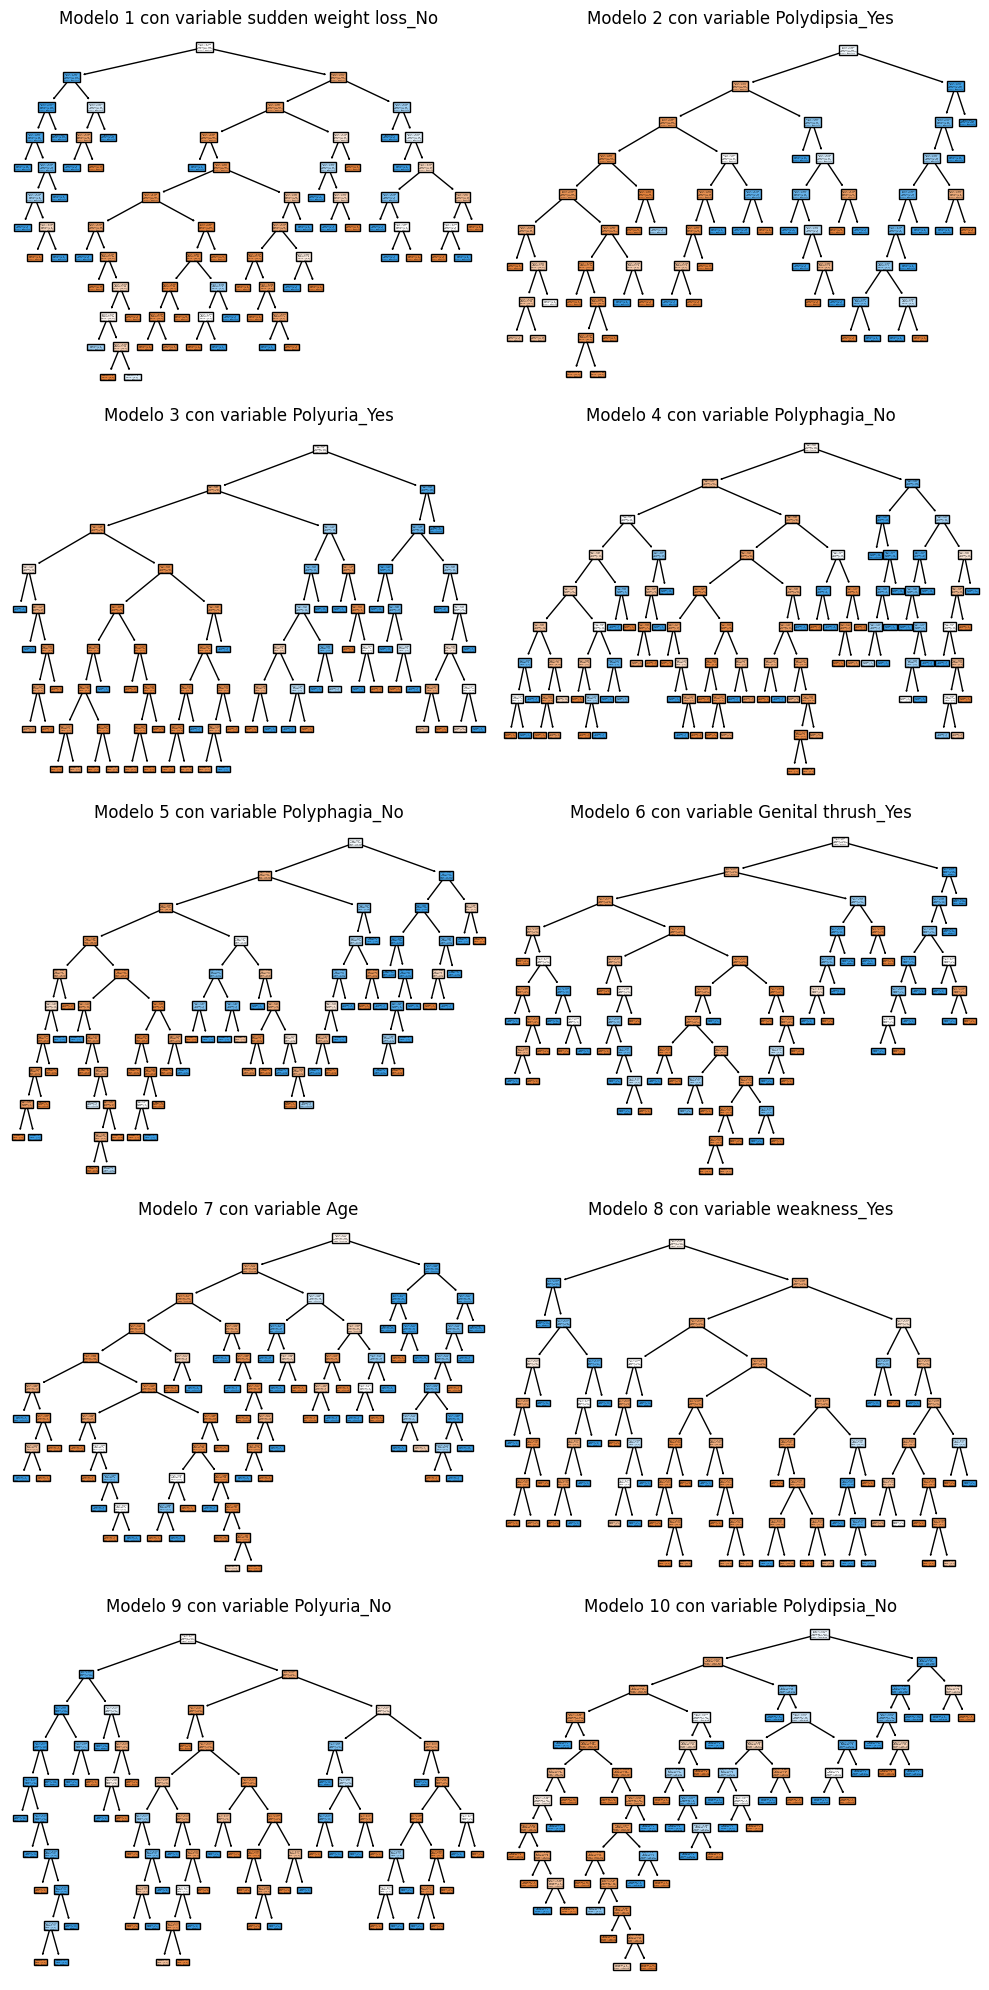

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definimos el número de filas y columnas con las que imprimiremos los árboles de decisión
ncols = 2
nrows = (num_models + ncols - 1) // ncols

# Definimos la figura y los ejes
fig, axes = plt.subplots(figsize=(10, num_models * 2),
                         nrows=nrows,
                         ncols=ncols,
                         sharex=True,
                         dpi=100)

# Imprimimos los árboles de decisión correspondientes a cada modelo
for i, ax in enumerate(axes.flatten()):
    if i < num_models:
        plot_tree(bagging.estimators_[i], class_names=['Positive',
                                                       'Negative '], filled=True, ax=ax)
        ax.set_title("Modelo " + str(i+1) + " con variable " + x.columns[bagging.estimators_features_[i][0]])

# Ajustamos los espacios entre subplots para una mejor visualización
plt.tight_layout()
plt.show()

## Ensembles Boosting
Boosting es un método de ensemble que construye varios clasificadores base de manera secuencial, donde cada clasificador se entrena para mejorar el rendimiento del conjunto en los ejemplos mal clasificados por los clasificadores anteriores ¹². En este caso utilizaremos dos algoritmos de Boosting: AdaBoost y Gradient Boosting.

* AdaBoost inicia ajustando un clasificador en el conjunto de datos original y luego ajusta copias adicionales del clasificador en el mismo conjunto de datos, pero donde los pesos de las instancias mal clasificadas se ajustan para que los clasificadores posteriores se centren más en los casos difíciles ². Los principales hiperparámetros de AdaBoost incluyen el número de estimadores (n_estimators) y la tasa de aprendizaje (learning_rate) ².

* Gradient Boosting construye un modelo aditivo de manera secuencial, permitiendo la optimización de funciones de pérdida diferenciables arbitrarias ¹. En cada etapa, se ajustan árboles de regresión en el gradiente negativo de la función de pérdida ¹. Los principales hiperparámetros de Gradient Boosting incluyen el número de estimadores (n_estimators), la tasa de aprendizaje (learning_rate), la profundidad máxima del árbol (max_depth) y la función de pérdida (loss) ¹.

Referencia:
(1) sklearn.ensemble.GradientBoostingClassifier — scikit-learn 1.3.0 https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html.
(2) sklearn.ensemble.AdaBoostClassifier — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html.
(3) sklearn.ensemble.AdaBoostRegressor — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html.

Iniciamos hallando los mejores hiperpárametros para los dos algoritmos de Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Hacemos una copia de los datos ya preparados
x= x_copy.copy()
y= y_copy.copy()

# Definimos el rango de valores para los hiperparámetros de AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Definimos el rango de valores para los hiperparámetros de Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Creamos los clasificadores AdaBoost y Gradient Boosting
ada_boost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()

# Ejecutasmos la búsqueda de hiperparámetros para AdaBoost
ada_grid_search = GridSearchCV(ada_boost, ada_params, cv=5)
ada_grid_search.fit(x, y)

# Obtener los mejores hiperparámetros para AdaBoost
best_ada_params = ada_grid_search.best_params_

# Realizar la búsqueda de hiperparámetros para Gradient Boosting
gb_grid_search = GridSearchCV(gradient_boosting, gb_params, cv=5)
gb_grid_search.fit(x, y)

# Obtener los mejores hiperparámetros para Gradient Boosting
best_gb_params = gb_grid_search.best_params_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para AdaBoost: ", best_ada_params)
print("Mejores hiperparámetros para Gradient Boosting: ", best_gb_params)


Mejores hiperparámetros para AdaBoost:  {'learning_rate': 0.1, 'n_estimators': 200}
Mejores hiperparámetros para Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


### Algoritmo AdaBoost

Aplicamos el algoritmo Adaptive Boosting especificando el número de estimadores (n_estimators) que utilizaremos como parámetro.

In [ ]:
# Definimos el número de estimadores
n_estimators = 200


# Definimos el modelo AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=0.01, random_state=42)

# Ajustamos el modelo a los datos de entrenamiento
adaboost.fit(x, y)

# Realizamos predicciones en el conjunto de prueba
y_pred = adaboost.predict(x)
train_err = (y_pred != y).mean()
print(f'Train Error: {train_err:.1%}')



Train Error: 12.3%


A fin de realizar una gráfica de la clasificación de los niveles de diabetes utilizaremos únicamente las dos variables más relevantes.

In [ ]:
def plot_ensemble(x: np.ndarray,
                  y: np.ndarray,
                  plot_step: float,
                  name_columns: object,
                  clf: object):
    """Plot samples in 2D with decision boundary"""

    # Aseguramos que los datos de 'y' sean correctos
    assert set(y) == {0, 1}
    #assert set(y) == {"Negative","Positive"}
    # Declaramos la figura
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    fig.set_facecolor('white')

    # Calculamos los valores mínimos y máximos para el gráfico
    pad = 0.8
    x_min, x_max = x[:, 0].min() - pad, x[:, 0].max() + pad
    y_min, y_max = x[:, 1].min() - pad, x[:, 1].max() + pad

    # Dibujamos los puntos de la clase "Negative" (etiqueta 0)
    x_0 = x[y == 0]
    ax.scatter(*x_0.T, marker='o', c='red', label='Negative')

    # Dibujamos los puntos de la clase "Positive" (etiqueta 1)
    x_1 = x[y == 1]
    ax.scatter(*x_1.T, marker='o', c='green', label='Positive')

    # Utilizamos el modelo para predecir los datos y dibujar las fronteras de decisión de cada clase
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=name_columns[:2])
    Z = clf.predict(mesh_df)
    Z = Z.reshape(xx.shape)
    fill_colors = ['r', 'g']
    ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)

    # Indicamos los límites, etiquetas y posición de la leyenda en el gráfico
    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel(name_columns[0])
    ax.set_ylabel(name_columns[1])
    ax.legend(loc='upper left', fontsize='medium')


Obtendremos las dos variables más significativas para el modelo, las cuales utilizaremos como ejemplo para la representación gráfica.

In [ ]:
importances_adaboost = adaboost.feature_importances_
indices_adaboost = np.argsort(importances_adaboost)[::-1]

print("Las dos variables más importantes son:")
for f in range(2):
    print(f"{f+1}. {x.columns[indices_adaboost[f]]}: {round(importances_adaboost[indices_adaboost[f]], 2)}")

Las dos variables más importantes son:
1. Polydipsia_Yes: 0.42
2. Polyuria_Yes: 0.41


A continuación, visualizamos el gráfico y el error de entrenamiento obtenido al utilizar únicamente estas dos variables con el modelo AdaBoostClassifier.

Train Error: 12.3%


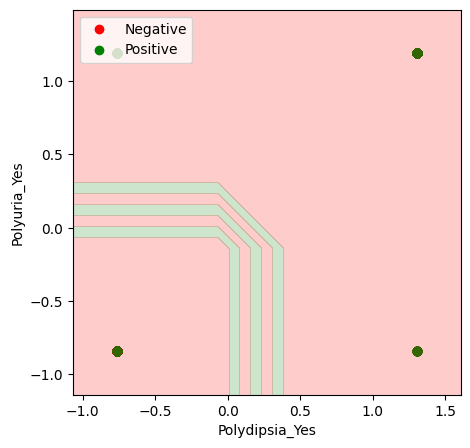

In [ ]:
# Imprimimos gráfico utilizando solo las dos variables más importantes
x_adaboost = x.iloc[:, indices_adaboost[:2]].copy()
name_columns = x_adaboost.columns

adaboost_optimized = AdaBoostClassifier(n_estimators=num_models, random_state=42).fit(x_adaboost, y)

# Llamamos a la función plot_ensemble
plot_ensemble(x_adaboost.to_numpy(), y, 0.5, name_columns, adaboost_optimized)


# Realizamos la predicción con el modelo optimizado e imprimimos de nuevo el error de entrenamiento
y_pred = adaboost_optimized.predict(x_adaboost)
train_err = (y_pred != y).mean()
print(f'Train Error: {train_err:.1%}')

## Gradient Boosting

In [ ]:
# Definimos el número de modelos que entrenaremos
num_models = 200

# Definimos el modelo GradientBoostingClassifier
gradientboost = GradientBoostingClassifier(n_estimators=num_models, learning_rate=0.1, max_depth=7 ,random_state=42).fit(x, y)

# Ejecutamos la predicción e imprimimos el error de entrenamiento
train_err = (gradientboost.predict(x) != y).mean()
print(f'Train Error: {train_err:.1%}')

Train Error: 0.2%


In [ ]:
importances_gradientboost = gradientboost.feature_importances_
indices_gradientboost = np.argsort(importances_gradientboost)[::-1]

print("Las dos variables más importantes son:")
for f in range(2):
    print(f"{f+1}. {x.columns[indices_gradientboost[f]]}: {round(importances_gradientboost[indices_gradientboost[f]], 2)}")

Las dos variables más importantes son:
1. Polyuria_Yes: 0.49
2. Age: 0.12


Train Error: 11.1%


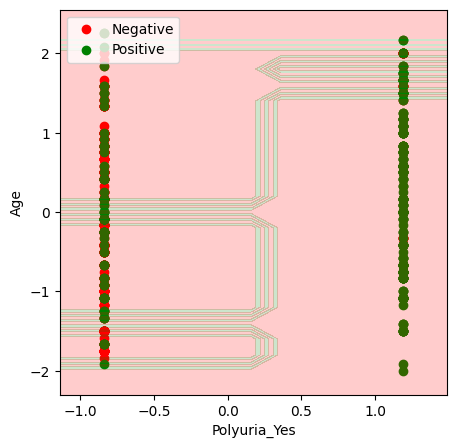

In [ ]:
# Imprimimos gráfico utilizando solo las dos variables más importantes
X_scaled_gradientboost = x.iloc[:, indices_gradientboost[:2]].copy()
name_columns = X_scaled_gradientboost.columns
gradientboost_optimized = GradientBoostingClassifier(n_estimators=num_models, random_state=42).fit(X_scaled_gradientboost, y)

# Llamamos a la función plot_ensemble
plot_ensemble(X_scaled_gradientboost.to_numpy(), y, 0.2, name_columns, gradientboost_optimized)


# Realizamos la predicción con el modelo optimizado e imprimimos de nuevo el error de entrenamiento
y_pred = gradientboost_optimized.predict(X_scaled_gradientboost)
train_err = (y_pred != y).mean()
print(f'Train Error: {train_err:.1%}')

En conclusión, este proyecto se centra en la aplicación de varios modelos de ensembles al conjunto de datos obtenido de la página web del repositorio UCI Machine Learning. Se espera que los resultados obtenidos contribuyan al desarrollo de herramientas eficientes para la detección y prevención de la diabetes, basadas en la información recopilada en el artículo de referencia y en el conjunto de datos disponible.
